# 作业十一

## Ising model&8.4计算立方格子的性质(先做二维的，三维的做一步算一步)
### 一、背景介绍
### 伊辛模型(Ising model)多粒子系统中具有代表性的模型，它用来处理一个由有相互作用多个自旋子构成的多粒子系统，其中每个自旋的位置被固定在一个格点上，每个自旋和它最相邻的自旋之间有相互作用。

### 二、原理分析
### 考虑在二维平面内的位置固定于格点上的自旋，其相互之间有相互作用，我们只考虑最邻近的自旋之间的相互作用以及每个自旋和外磁场之间的相互作用，对于某一个自旋，其自旋方向有两种情况，即朝上和朝下。整个系统的能量由下式表出：
### $$E=J\sum_{<ij>}s_is_j-\mu H\sum_i s_i\tag{1}$$
### 其中，J为交换常数，μ表示两个粒子的相互作用能的大小，H为自旋的磁动量，s_{i}为外加磁场强度，表示第i个粒子和第j个粒子的自旋的大小，在这里我们假设：
### $$s_i=\begin{cases}1,自旋朝上\\-1, 自旋朝下\end{cases}$$
### 对于N个自旋，在温度为T时的磁化强度为：
### $$M=\sum_i<s_i>=N<s_i>\tag{2}$$
### 此处考虑理想化情况：假设系统无限大，我们考虑的系统离边界很远，于是我们忽略边界效应系统中每个粒子的平均自旋相等。假设没有外场作用，则系统的能量为：
### $$E=-J\sum_{<ij>}s_is_j=-\left(J\sum_{<ij>}s_j\right)s_i\tag{3}$$
### 将括号中的因子视为一个等效的外场：
### $$\mu H_{eff}=J\sum_{<ij>}s_j\tag{4}$$
### 记离一个自旋最近的自旋数量为z，则有：
### $$H_{eff}=\cfrac{J}{\mu}\sum s_j=\cfrac{zJ}{\mu}<s>\tag{5}$$
### 在正则系综下，微观态的分布遵循波尔兹曼分布， 考虑系统中的某一自旋，其取值如(2)式所述，其平均值为：
### $$<s_i>=\sum_{s_i=\pm1}s_i P_{\pm}=P_{+}-P_{-}=\tanh (\mu H/k_B T)\tag{6}$$
### 得到：$$<s>=\tanh(zJ<s>/k_B T)\tag{7}$$

### 三、Monte Carol 模拟
### 蒙特卡洛方法用随机方法，模拟系统中的自旋子和外界热源交换的能量。(1) 选择一个自旋，假设其原先的能量为E，可由（1）式计算得到，计算其反转所需要的能量：$$E_{flip}=-2E$$；(2) 当$$E_{flip}<0$$，反转自旋；当$$E_{flip}>0$$，将波尔兹曼因子$$\exp(-E_{flip}/k_BT)$$与一个在0和1之间均匀分布的随机数比较，如果波尔兹曼因子比随机数大，将自旋反转，反之则让自旋保持原状态。
### 转变状态的粒子数和转变速率与粒子处在的微观态的概率的乘积成正比，如果将两种转变的数量相等，意味着系统和热源达到热力学平衡：$$P_1W(1\to2)=P_2W(2\to1)$$得到：$$\cfrac{P_1}{P_2}=\exp[-(E_1-E_2)/k_BT]$$即粒子在某个态的概率遵循波尔兹曼分布，这和统计物理给出的结果相符合，所以用蒙特卡洛方法模拟是正确的。

In [3]:
import numpy as np
import random
import pylab as pl

def init_spin_array(rows, cols):
    return np.ones((rows, cols))

def find_neighbors(spin_array, lattice, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % lattice)
    top    = (x - 1, y)
    bottom = ((x + 1) % lattice, y)
    neighber = [spin_array[left[0], left[1]],
                spin_array[right[0], right[1]],
                spin_array[top[0], top[1]],
                spin_array[bottom[0], bottom[1]]]
    """
    if x == 0:#下边界
        neighber[3] = 0
    if x == lattice:#上边界
        neighber[2] = 0
    if y == 0:#左边界
        neighber[0] = 0
    if y == lattice:#右边界
        neighber[1] = 0
    """
    return neighber

def energy(spin_array, lattice, x ,y, H):#反转的能量
    return 2 * spin_array[x, y] * sum(find_neighbors(spin_array, lattice, x, y)) \
           + H * sum(sum(spin_array)) 
           
def monte_carlo(spin_array, lattice, temperature, H):
    E1 = 0
    for i in range(lattice):
        for j in range(lattice):
            e = energy(spin_array, lattice, i, j, H)
            if e <= 0:
                spin_array[i, j] = -1 * spin_array[i, j]
            elif np.exp((-1.0 * e)/temperature) > random.random():
                spin_array[i, j] = -1 * spin_array[i, j]
            E1 = E1 + energy(spin_array, lattice, i, j, H) / (-4.0)#每个自旋的能量
    return [E1, spin_array]

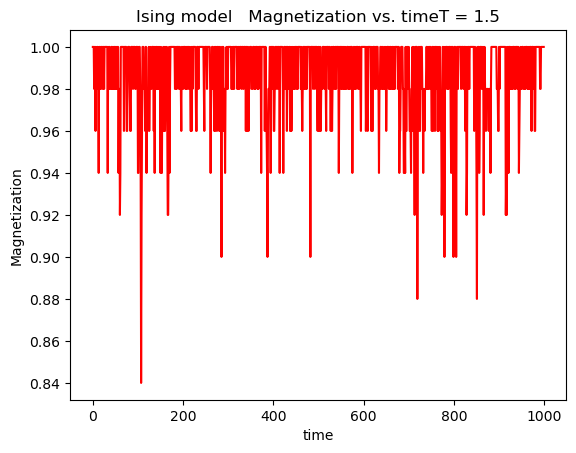

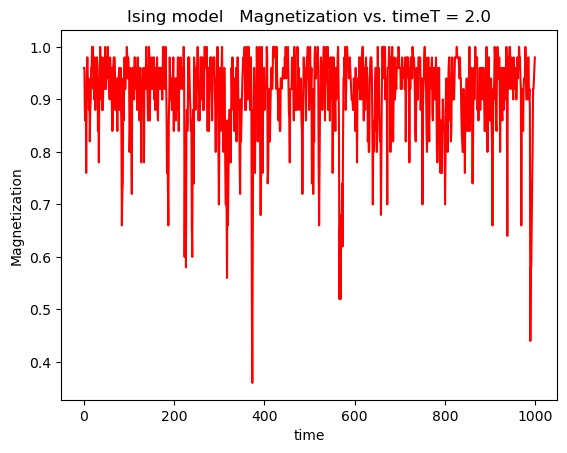

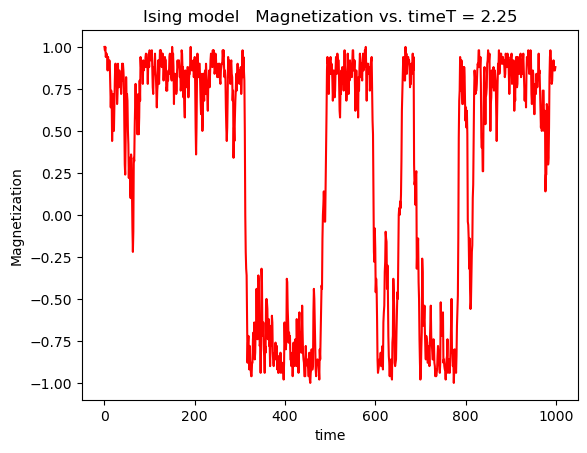

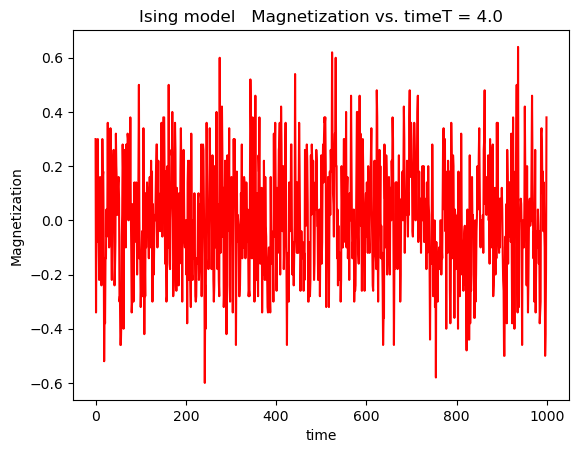

In [3]:
#磁化温度和时间
def calculate(temp):
    RELAX_SWEEPS = 0
    lattice = 10
    sweeps = 1000
    M1 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    SWEEP = range(sweeps + RELAX_SWEEPS)
    for H in [0]:
        for temperature in [temp]:#np.arange(0, 1.5, 0.05):
            spin_array = init_spin_array(lattice, lattice)
            for sweep in range(sweeps + RELAX_SWEEPS):
                [e, spin_array] = monte_carlo(spin_array, lattice, temperature, H)
                M1[sweep] = sum(sum(spin_array)) / lattice ** 2
            #磁化强度和时间的关系
            pl.title('Ising model   Magnetization vs. time'+'T = '+str(temperature))
            pl.ylabel('Magnetization')
            pl.xlabel('time')
            pl.plot(SWEEP, M1, 'r')

pl.figure()
calculate(1.5)

pl.figure()
calculate(2.0)

pl.figure()
calculate(2.25)

pl.figure()
calculate(4.0)

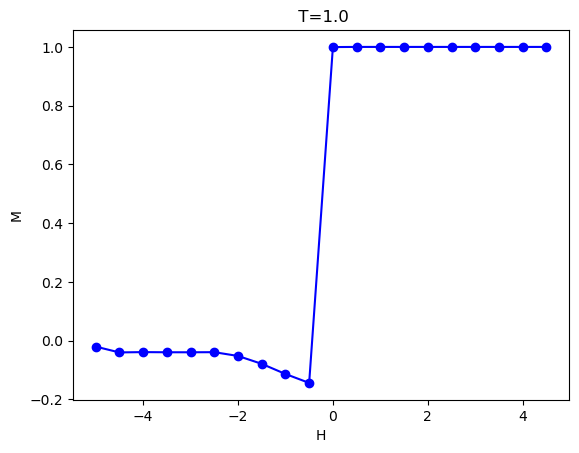

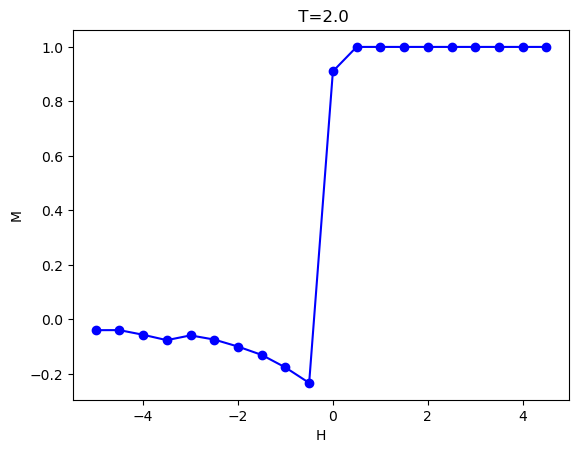

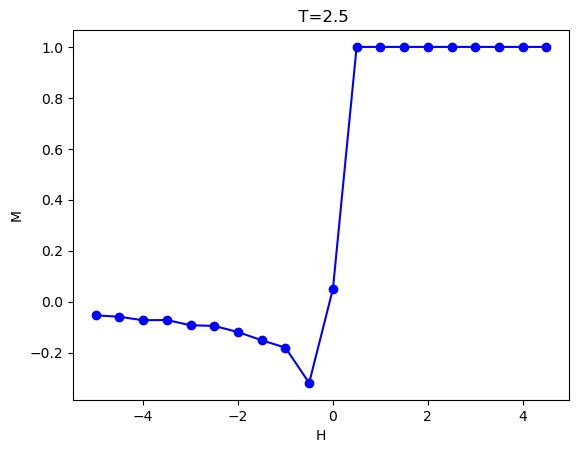

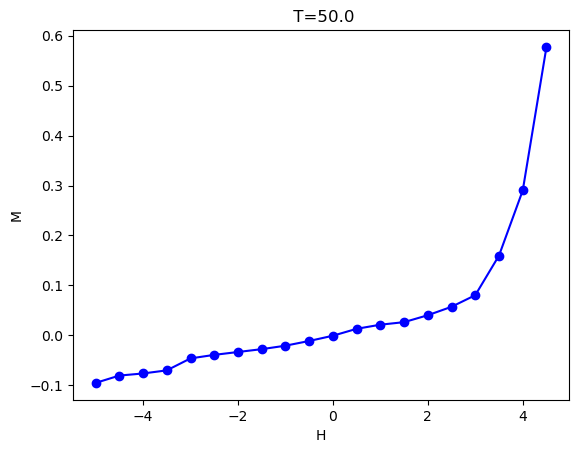

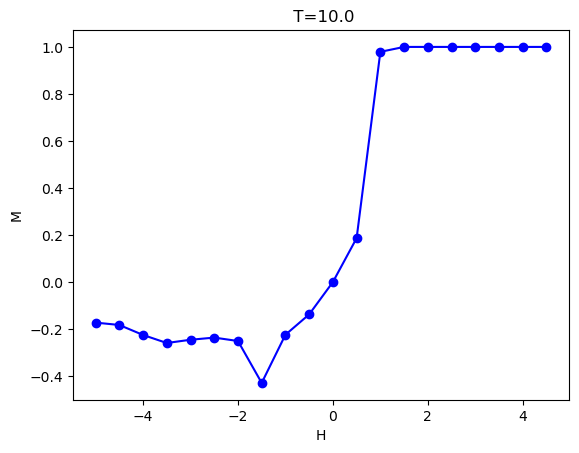

In [4]:
#观察磁化强度随外场变化
def calculate(temp):
    Magnetization = []
    RELAX_SWEEPS = 0
    lattice = 10#eval(input("Enter lattice size: "))
    sweeps = 1000#eval(input("Enter the number of Monte Carlo Sweeps: "))
    M1 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    HH = []
    for temperature in [temp]:
        for H in np.arange(-5, 5, 0.5):
            spin_array = init_spin_array(lattice, lattice)
            for sweep in range(sweeps + RELAX_SWEEPS):
                [e, spin_array] = monte_carlo(spin_array, lattice, temperature, H)
                M1[sweep] = sum(sum(spin_array))
            HH.append(H)
            Magnetization.append(sum(M1) / (RELAX_SWEEPS + sweeps) / (lattice ** 2))
        pl.title(' T=' + str(temperature))
        pl.ylabel('M')
        pl.xlabel('H')
        pl.plot(HH, Magnetization, 'bo-')

pl.figure()
calculate(1.0)

pl.figure()
calculate(2.0)

pl.figure()
calculate(2.5)

pl.figure()
calculate(50.0)

pl.figure()
calculate(10.0)

In [7]:
#计算热力学量

def calculate1():
    Energy = []
    Magnetization = []
    Temperature = []
    RELAX_SWEEPS = 0
    lattice = 10
    sweeps = 1000
    M1 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    E1 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    #M2 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    #E2 = [0 for i in range(sweeps + RELAX_SWEEPS)]
    for H in np.arange(-5, 5, 0.2):
        for temperature in np.arange(0, 5.0, 0.1):
            spin_array = init_spin_array(lattice, lattice)
            for sweep in range(sweeps + RELAX_SWEEPS):
                [e, spin_array] = monte_carlo(spin_array, lattice, temperature, H)
                E1[sweep] = e 
                M1[sweep] = sum(sum(spin_array))
                #E2[sweep] =(e) ** 2 
                #M2[sweep] = (sum(sum(spin_array))) ** 2
    
            #能量和磁化强度
            Energy.append(sum(E1) / (RELAX_SWEEPS + sweeps) / (lattice ** 2))
            
            Magnetization.append(abs(sum(M1)) / (RELAX_SWEEPS + sweeps) / (lattice ** 2))
        
            #磁化率
            '''
            Suscepetibility.append((sum(M2) / (RELAX_SWEEPS + sweeps) - sum(M1) \
                       ** 2 / (RELAX_SWEEPS + sweeps) ** 2) \
                        / (RELAX_SWEEPS + sweeps) / temperature)            
            '''

            #热容
            '''
            Specificheat.append((sum(E2) / (RELAX_SWEEPS + sweeps) - sum(E1) \
                                  ** 2 / (RELAX_SWEEPS + sweeps) ** 2) \
                                / (RELAX_SWEEPS + sweeps) / temperature ** 2)
            Temperature.append(temperature)               
            '''

    pl.figure()
    pl.title('Ising model    Magnetization versus Temperature')
    pl.ylabel('Magnetization')
    pl.xlabel('Temperature')
    pl.plot(Temperature, Magnetization, 'bo')

    
calculate1()  

/tmp/ipykernel_1355/141974041.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  elif np.exp((-1.0 * e)/temperature) > random.random():


KeyboardInterrupt: 

温度= 0.02    磁矩= 1.0    总能量= -1800.0
温度= 0.07030303030303031    磁矩= 1.0    总能量= -1800.0
温度= 0.12060606060606062    磁矩= 1.0    总能量= -1800.0
温度= 0.17090909090909093    磁矩= 1.0    总能量= -1800.0
温度= 0.22121212121212122    磁矩= 1.0    总能量= -1800.0
温度= 0.27151515151515154    磁矩= 1.0    总能量= -1800.0
温度= 0.3218181818181819    磁矩= 1.0    总能量= -1800.0
温度= 0.3721212121212122    磁矩= 1.0    总能量= -1800.0
温度= 0.4224242424242425    磁矩= 1.0    总能量= -1800.0
温度= 0.4727272727272728    磁矩= 1.0    总能量= -1800.0
温度= 0.5230303030303031    磁矩= 1.0    总能量= -1800.0
温度= 0.5733333333333334    磁矩= 1.0    总能量= -1800.0
温度= 0.6236363636363638    磁矩= 1.0    总能量= -1800.0
温度= 0.6739393939393941    磁矩= 1.0    总能量= -1800.0
温度= 0.7242424242424244    磁矩= 0.9999777777777777    总能量= -1800.0
温度= 0.7745454545454546    磁矩= 1.0    总能量= -1800.0
温度= 0.8248484848484849    磁矩= 0.9999333333333333    总能量= -1800.0
温度= 0.8751515151515152    磁矩= 0.9995333333333335    总能量= -1800.0
温度= 0.9254545454545455    磁矩= 0.9994666666666671    总能量= -1800.0

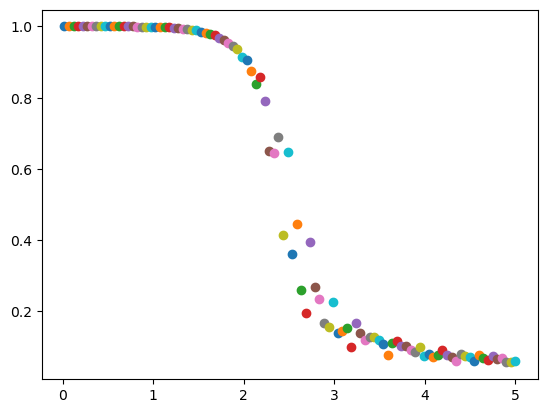

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import time


def main():
    size = 30  # 体系大小
    for T in np.linspace(0.02, 5, 100):
        ising, magnetism = get_one_sample(sizeOfSample=size, temperature=T)
        print('温度=', T, '   磁矩=', magnetism, '   总能量=', calculateAllEnergy(ising))
        plt.plot(T, magnetism, 'o')
    plt.show()


def get_one_sample(sizeOfSample, temperature):
    newS = np.zeros((sizeOfSample, sizeOfSample))  # 初始状态
    magnetism = 0
    for i00 in range(100):
        newS = Metropolis(newS, temperature)
        magnetism = magnetism + abs(sum(sum(np.cos(newS))))/newS.shape[0]**2
    magnetism = magnetism/100
    return newS, magnetism


def Metropolis(S, T):  # S是输入的初始状态， T是温度
    k = 1  # 玻尔兹曼常数
    for i in range(S.shape[0]):
        for j in range(S.shape[0]):
            newAngle = np.random.randint(-1, 1)*np.pi
            energyBefore = getEnergy(i=i, j=j, S=S, angle=None)  # 获取该格点的能量
            energyLater = getEnergy(i=i, j=j, S=S, angle=newAngle)  # 获取格点变成新角度时的能量
            alpha = min(1.0, math.exp(-(energyLater - energyBefore)/(k * T)))  # 这个接受率对应的是玻尔兹曼分布
            if random.uniform(0, 1) <= alpha:
                S[i, j] = newAngle   # 接受新状态
            else:
                pass  # 保持为上一个状态
    return S


def getEnergy(i, j, S, angle=None):  # 计算(i,j)位置的能量，为周围四个的相互能之和
    width = S.shape[0]
    height = S.shape[1]
    top_i = i - 1 if i > 0 else width - 1  # 用到周期性边界条件
    bottom_i = i + 1 if i < (width - 1) else 0
    left_j = j - 1 if j > 0 else height - 1
    right_j = j + 1 if j < (height - 1) else 0
    environment = [[top_i, j], [bottom_i, j], [i, left_j], [i, right_j]]
    energy = 0
    if angle == None:
        for num_i in range(4):
            energy += -np.cos(S[i, j] - S[environment[num_i][0], environment[num_i][1]])
    else:
        for num_i in range(4):
            energy += -np.cos(angle - S[environment[num_i][0], environment[num_i][1]])
    return energy


def calculateAllEnergy(S):  # 计算整个体系的能量
    energy = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            energy += getEnergy(i, j, S)
    return energy/2  # 作用两次要减半


if __name__ == '__main__':
    main()

### 四、结论
### 通过用蒙特卡洛方法对伊辛模型进行模拟，得到了有关相变的各个热力学量包括能量，磁化强度，热容，磁化率等，从这些热力学量随温度的变化关系可以知道，当无外磁场作用时，在某个特定温度下会发生相变，这种相变就是顺磁相变，它是一种二级相变；而当有外磁场作用时，当磁场变化方向时，系统热会发生相变，只不过此时对应的是一种一级相变，温度的作用变得更小了，而在高温时，温度和外磁场的共同作用使得相变又发生了变化，使磁化强度的变化变得连续，而非之前的突然跳变。

# 三维Ising model尝试

### 在一维、二维或三维的每个格点上占据一个自旋. 每个Ising自旋在空间有2个量子化的方向, 即其指向可以向上或向下. 在一维Ising模型中, m个自旋排成一排, 每个自旋仅与其左右2个最近邻的自旋有相互作用. 在二维正方Ising模型中, 有n个相同的自旋排, 每个自旋与前后左右相邻的4个自旋有相互作用, 构成了一个二维的自旋阵列. 三维立方Ising模型就是有l个相同的二维自旋阵列, 每个自旋与其左右、前后、上下6个最近邻的自旋有相互作用. 可以看出, 随着维度的增加, 每个自旋的最近邻自旋数增加. 目前Ising模型仅有公认的一维和二维的精确解. 三维Ising模型精确求解的根本性困难是, 在三维Ising模型中存在自旋相互作用的非局域效应.尽管模型本身仅仅考虑最近邻相互作用, 实际上在三维Ising模型中存在类似于长程相互作用的效应.
### 重整化群近似计算：

##### 1.Monte Carlo

In [9]:
from numba import jit

import random
import numpy
import math

#   Function to generate uniform random numbers

@jit(nopython=True)
def pick_random(ran0):
    
    ran0=round(random.uniform(0,1),12)
    
    return ran0 

#   End of function

def magnetization_sum(nlayers,iterator,iterator2,start_matrix,magnetization_sumer):
    magnetization_sumer=0
    for k in range(0,nlayers):                      #   Depth
        for i in range(1,iterator):                 #   Rows
            for j in range(1,iterator2):            #   Columns
                magnetization+=start_matrix[k,i,j]
    print(magnetization_sumer)    

#   Function to perfrom Montecarlo loop

@jit(nopython=True)
def Monte_Carlo(m , n , d , i , j , k , ipass , npass , nequil , iterator , iterator2 , nlayers , ran0 , a , magnetization , magnetization_ave , magnetization2_ave , energy , beta , DeltaU , output_count,energy_ave,energy2_ave ):
    
    for ipass in range(0,npass+1): 
    
        if(ipass>nequil):
            
            output_count+=1            
            magnetization = numpy.sum(a[0:nlayers,1:iterator-1,1:iterator-1])/(nlayers*iterator*iterator2*1.0)     #   Calling magnetization summing function 
            magnetization_ave = magnetization_ave + magnetization
            magnetization2_ave = magnetization2_ave + magnetization**2
            energy = 0.00

            for k in range(0,nlayers):              #   Depth
                for i in range(0,iterator):         #   Row
                    for j in range(0,iterator2):    #   Column

                        if(d!=0 and d!=(nlayers-1)):    #   When the matrix element is not on the top or bottom layer
                            energy = energy - a[d,m,n]*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d+1,m,n]+a[d-1,m,n])
                        elif(d==0):                     #   When the matrix element is on the bottom layer
                            energy = energy - a[d,m,n]*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d+1,m,n])
                        else:                           #   When the matrix element is on the top layer
                            energy = energy - a[d,m,n]*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d-1,m,n])


            energy = energy / (nlayers*iterator*iterator2*2.0)
            energy_ave = energy_ave + energy
            energy2_ave = energy2_ave + energy**2

        ran0=pick_random(ran0) 
        m=int((iterator-2)*ran0)                    #   Picking random spin row number
        ran0=pick_random(ran0)
        n=int((iterator2-2)*ran0)                   #   Picking random spin column number
        ran0=pick_random(ran0)
        d=int((nlayers)*ran0)                       #   Picking random spin depth number
        trial_spin=-1*(a[d,m,n]) 

        if(d!=0 and d!=(nlayers-1)):    #   When the matrix element is not on the top or bottom layer
            DeltaU = -1*(trial_spin*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d+1,m,n]+a[d-1,m,n])*2)
        elif(d==0):                     #   When the matrix element is on the bottom layer
            DeltaU = -1*(trial_spin*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d+1,m,n])*2)
        else:                           #   When the matrix element is on the top layer
            DeltaU = -1*(trial_spin*(a[d,m-1,n]+a[d,m+1,n]+a[d,m,n-1]+a[d,m,n+1]+a[d-1,m,n])*2)
        
        ran0=pick_random(ran0)
        log_eta=math.log(ran0+(1e-10))
        
        if(-beta*DeltaU>log_eta):
            
            a[d,m,n]=trial_spin

            if(m==1):
                a[d,iterator-1,n]=trial_spin
            
            if(m==iterator-1):
                a[d,0,n]=trial_spin
            
            if(n==1):
                a[d,m,iterator2-1]=trial_spin
            
            if(n==iterator2-1):                
                a[d,m,0]=trial_spin

    return m , n , d , i , j , k , ipass , npass , nequil , iterator , iterator2 , nlayers , ran0 , a , magnetization , magnetization_ave , magnetization2_ave , energy , beta , DeltaU , output_count,energy_ave,energy2_ave

#   End of function

##### 2.Input_param_reader

In [10]:
def Ising_input():

    nrows = 20              #  number of rows of spins (even number)
    
    ncols = 20              #  number of columns of spins (even number)

    nlayers = 3             #  number of layers in the quasi 3D Matrix

    npass = 600000          #  number of passes for each temperature

    nequil = 450000         #  number of equilibration steps for each temperature

    high_temp = 5.92        #  temperature to start scan at

    low_temp = 0.92         #  temperature to finish scan at

    temp_interval = 0.01    #  scanning interval

    ConfigType = 1          #  1: checkerboard, 2: interface, 3: unequal interface, 4: Random Matrix

    return nrows, ncols, nlayers, npass, nequil, high_temp, low_temp, temp_interval, ConfigType

##### 3.Path

In [11]:
from datetime import date, datetime
import time
import os

def Output_Path_Set():                                          #   Function to create folder based on date and time of execution and set it as working directory 
    now = datetime.now()                                        #   Fetching current date and time
    path_current_time = now.strftime("%H-%M-%S__%d-%b-%Y")      #   Formatting date and time to suit windows nomenclature

    try:                                                        #   Try catch to open file name based on path_current_time
        os.makedirs(path_current_time)
        os.chdir(path_current_time)    
    except FileExistsError:                                     #   Display error in case of file already existing
        print(path_current_time,"FIle already exists")

    return path_current_time                                    #   Returning date time to main program

##### 4.Main_3D

In [12]:
from numba                  import jit              #   Python Package to be downloaded manually 
import random
import numpy
import time
import math
import csv
import os



time_start = time.perf_counter()    #   For Program Runtime Profiling. Time.clock() has been depreciated 



i=0                     #   Dummy Integer
j=0                     #   Dummy Integer
k=0                     #   Dummy Integer
m=0                     #   Dummy Integer
n=0                     #   Dummy Integer
d=0                     #   Dummy Integer
nrows=0                 #   Number of Rows in A
ncols=0                 #   Number of Columns in A
nlayers=0               #   Number of Layers in Quasi 3D Matrix 
temp=0                  #   Temperature
beta=0                  #   Inverse Temperature
ConfigType=0            #   Starting Configuration type
npass=0                 #   number of passes for MC algorithm
ipass=0                 #   the current pass number
nequil=0                #   number of equilibration steps
trial_spin=0            #   values of changed spin
high_temp=0             #   starting temp for scan
low_temp=0              #   final temp for scan
temp_interval=0         #   interval between scan points
nscans=0                #   number of scans (each at diff T)
iscan=1                 #   current number
iscan1=0                #   current number
DeltaU=0                #   change in energy between 2 configs
log_eta=0               #   log of random number to compare to
magnetization=0         #   magnetization of all spins in lattice
magnetization_ave=0     #   cumulative average magnetization
magnetization2_ave=0    #   cumulative average of mag. squared
energy=0                #   energy of all spins in lattice
energy_ave=0            #   cumulative average of energy
energy2_ave=0           #   cumulative average of energy squared
output_count=0          #   Number of times things have been added to averages
ran0=0                  #   T B C
iterator=0              #   to be used with for loop / dummy operation
iterator2=0             #   to be used  for loop / dummy operations

print("\n")
print("MONTE CARLO QUASI 3D ISING MODEL\n")
print("Monte Carlo Statistics for Quasi 3D Ising Model with periodic boundary conditions\n")
print("The critical temperature is approximately 2.3, as seen on Chandler p. 123.\n")

#   This section is for reading input parameters and assigning it to global variables

nrows, ncols, nlayers, npass, nequil, high_temp, low_temp, temp_interval, ConfigType=Ising_input()

#   End of input parameter reader section

iterator = nrows        #   Setting iterator to be used as number of rows value
iterator2 = ncols       #   Setting iterator to be used as number of columns value

if(nrows%2!=0):
    iterator+=1
if(ncols%2!=0):
    iterator2+=1

print("Running program for %d rows, %d columns and %d layers\n" % (iterator,iterator2,nlayers))

#   Matrix arrays are stored as a[depth,row,column] manner in Numpy



a=numpy.ones((nlayers,iterator,iterator2),dtype=int)
start_matrix=a



#   Functions



#   Function to generate uniform random numbers

@jit(nopython=True)
def pick_random(ran0):
    
    ran0=round(random.uniform(0,1),12)
    
    return ran0 

#   End of function

#   Function to obtain magnetization value

@jit(nopython=True)
def magnetization_sum(nlayers,iterator,iterator2,a):
    return numpy.sum(a[0:nlayers,1:iterator-1,1:iterator-1])/(nlayers*iterator*iterator2*1.0)

#   End of function

path=Output_Path_Set()


input_config=open("Input_Config.csv","w+")                                #   To write input configuration to output folder in a seperate file for future use.
input_config.write("Number of Rows          :"+str(nrows))              
input_config.write("\nNumber of Columns       :"+str(ncols))
input_config.write("\nValue of npass          :"+str(npass))
input_config.write("\nValue of nequil         :"+str(nequil))
input_config.write("\nValue of high_temp      :"+str(high_temp))
input_config.write("\nValue of low_temp       :"+str(low_temp))
input_config.write("\nValue of temp_interval  :"+str(temp_interval))
input_config.write("\nConfigType              :"+str(ConfigType))
input_config.close()


spin_attribute = open("spin_array_attribute.csv", "w")
spin_attribute.write("number of rows        :"+str(nrows))
spin_attribute.write("\nnumber of columns   :"+str(ncols))
spin_attribute.write("\nnumber of layers    :"+str(nlayers))

nscans=int((high_temp-low_temp)/temp_interval+1)            #   Determining the number of scans

spin_attribute.write("\nnumber of scans     :"+str(nscans))
spin_attribute.write("\n2")

spin_attribute.close()

spin = open("spin_array.csv","w+")
spin_writer=csv.writer(spin)
spin_row=["temp","i","j","k","a[i,j]"]
spin_writer.writerow(spin_row)

magnet = open("magnetization.csv","w+")
magnet.write("Temp , Ave_magnetization , Ave_magnetization^2 , Susceptibility")
magnet.write("\n")
magnet_writer=csv.writer(magnet)

energyObj = open("energy.csv","w+")
energyObj.write("Temp , Ave_energy , Ave_energy^2 , C_v")
energyObj.write("\n")
energy_writer=csv.writer(energyObj)



#   Section for choosing Configtype



if(ConfigType==1):                                              
        
    #   Checkerboard Pattern Matrix
                
    start_matrix[1::2,::2,::2] = -1             #   Depth
    start_matrix[::2,1::2,::2] = -1             #   Row
    start_matrix[::2,::2,1::2] = -1             #   Column


elif(ConfigType==2):
        
    #   Interface Pattern Matrix

    for k in range(0,nlayers):                  #   Depth
        for i in range(0,iterator):             #   Row
            for j in range(0,iterator2):        #   Column
                if(j>=iterator2/2):
                    dummyval=-1
                else:
                    dummyval=1
                start_matrix[:,:,j]=dummyval
    dummyval=0   

elif(ConfigType==3):

    #   Unequal Interface Pattern Matrix

    for k in range(0,nlayers):                  #   Depth
        for i in range(0,iterator):             #   Row
            for j in range(0,iterator2):        #   Column
                if(j>=iterator2/4):
                    dummyval=-1
                else:
                    dummyval=1
                start_matrix[:,:,j]=dummyval
    dummyval=0

elif(ConfigType==4):

#   Random Pattern Matrix
    
    for k in range(0,nlayers):                  #   Depth
        for i in range(0,iterator):             #   Row
            for j in range(0,iterator2):        #   Column
                dummy=pick_random(ran0)
                if(dummy>=0.5):
                    dummy=1
                else:
                    dummy=-1
                start_matrix[k,i,j]=dummy

else:
    print("Error! Check ConfigType parameter in ising.in")



#   Scan Loop



for iscan in range(1,nscans+1):                                         #   Main for loop    
    temp = float(round((high_temp - temp_interval*(iscan-1)), 3))       #   rounding off to two decimal places for optimisation purposes 
    print("Running Program for Temperature : "+str(temp)+"\n")
    
    beta  =  1.0/temp                           #   Reseting variables to initial values
    output_count   =   0
    energy_ave  =  0.0
    energy2_ave  =  0.0
    magnetization_ave  =  0.0
    magnetization2_ave  =  0.0
    
    a=start_matrix                              #   Reseting matrix a to initial congiguration

    #   Main loop containing Monte Carlo algorithm
    
    m , n , d , i , j , k , ipass , npass , nequil , iterator , iterator2 , nlayers , ran0 , a , magnetization , magnetization_ave , magnetization2_ave , energy , beta , DeltaU , output_count , energy_ave , energy2_ave = Monte_Carlo( m , n , d , i , j , k , ipass , npass , nequil , iterator , iterator2 , nlayers , ran0 , a , magnetization , magnetization_ave , magnetization2_ave , energy , beta , DeltaU , output_count,energy_ave,energy2_ave )
    
    #   End Monte carlo pases



    for k in range(0,nlayers):                      #   Depth
        for i in range(0,iterator):                 #   Rows
            for j in range(0,iterator2):            #   Columns
                spin_row=[temp,k,i,j,a[k,i,j]]
                spin_writer.writerow(spin_row)
    
    magnet_row=[temp , abs(magnetization_ave/output_count) , magnetization2_ave/output_count , beta*(magnetization2_ave/output_count - (magnetization_ave/output_count)**2)]
    magnet_writer.writerow(magnet_row)
    
    energy_row=[temp , energy_ave/output_count , energy2_ave/output_count , (beta**2)*(energy2_ave/output_count - (energy_ave/output_count)**2)]
    energy_writer.writerow(energy_row)

#   End Scan Loop

print("\nProgram completed.\n\nOpen folder",path,"to view output.\n\n")

spin.close()                                         #   Closing open files.This part is important as open files may not allow writing of new data
magnet.close()
energyObj.close()

Profiler = open("Program_Profile.csv","a+")
time_elapsed=(time.perf_counter()-time_start)        #   Program execuion time profiler
time_elapsed=round(time_elapsed,5)
Profiler.write("\nProgram FInished running in "+str(time_elapsed)+" Seconds on "+str(time.ctime()))
Profiler.close()



MONTE CARLO QUASI 3D ISING MODEL

Monte Carlo Statistics for Quasi 3D Ising Model with periodic boundary conditions

The critical temperature is approximately 2.3, as seen on Chandler p. 123.

Running program for 20 rows, 20 columns and 3 layers

Running Program for Temperature : 5.92

Running Program for Temperature : 5.91

Running Program for Temperature : 5.9

Running Program for Temperature : 5.89

Running Program for Temperature : 5.88

Running Program for Temperature : 5.87

Running Program for Temperature : 5.86

Running Program for Temperature : 5.85

Running Program for Temperature : 5.84

Running Program for Temperature : 5.83

Running Program for Temperature : 5.82

Running Program for Temperature : 5.81

Running Program for Temperature : 5.8

Running Program for Temperature : 5.79

Running Program for Temperature : 5.78

Running Program for Temperature : 5.77

Running Program for Temperature : 5.76

Running Program for Temperature : 5.75

Running Program for Temperature :

#### 小结：这是由于三维Ising模型的自旋组态数是按照2N规律增加的,. 一般来说, 对于有限尺寸的小系统应用周期性边界条件. 不过, 这个方法对在热力学极限条件下精确求解三维Ising模型失效. 其原因是存在非局域效应, 沿着第三维度方向上的最近邻相互作用等效于一个长程的多体相互作用. 如上所述, 沿着第三维度方向上2个自旋的最近邻相互作用与平面内n个自旋的可能组态2n密切相关. 而在热力学极限条件下自旋数n为无限大, 这意味着任何有限尺寸的子系统加周期性边界条件的方法无法高精度地模拟系统的热力学性质. 由于采用周期性边界条件, 有限尺寸三维Ising模型的Monte Carlo模拟会获得没有尖锐峰的比热, 从而无法精确地确定临界点的位置以及无法很好地分析临界现象.对二维Ising模型, Monte Carlo方法可以获得较高精度的结果, 这不仅仅因为可以模拟大尺寸的二维系统, 更因为在二维Ising模型中不存在非局域效应. 实际上, Monte Carlo方法与重整化群技术的结合也无法克服非局域性所造成的计算困难.